In [50]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('ProfitAndLossData/tsi_crypto_returns.csv')
#data = data.transpose()
data

,retuns
0,0.88
1,2.73
2,2.30
3,0.59
4,5.94
...,...
302,0.10
303,-14.40
304,1.00
305,-29.20


In [43]:
def MonteCarloSimulation(df, initial_cash, num_simulations, num_periods):
    returns = df['retuns'].values
    num_returns = len(returns)
    simulations = np.zeros((num_simulations, num_periods))

    #set initial cash for all simulations
    simulations[:, 0] = initial_cash

    for sim in range(num_simulations):
        #define a fixed initial cash for all the simulations
        current_cash = initial_cash
        for period in range(num_periods):
            #select a random sample from the historical returns without repeating the same sample
            random_sample = np.random.choice(returns, replace=False)
            current_cash += random_sample
            simulations[sim, period] = current_cash

    return simulations      
        

In [58]:
# Parameters
initial_cash = 1000
num_simulations = 100000
num_periods = len(data)


In [59]:
#Run simulations
all_simulations = MonteCarloSimulation(data, initial_cash, num_simulations, num_periods)
all_simulations

array([[1000.27, 1003.89, 1003.5 , ..., 1880.49, 1881.  , 1880.57],
       [1014.66, 1167.06, 1168.37, ..., 2233.05, 2232.66, 2232.98],
       [1000.14, 1000.19, 1000.34, ..., 2059.7 , 2060.96, 2061.06],
       ...,
       [ 997.8 , 1030.94, 1031.61, ..., 1246.98, 1247.57, 1247.75],
       [ 999.93,  999.97, 1014.63, ..., 1669.13, 1668.39, 1669.92],
       [1000.21, 1146.08, 1147.1 , ..., 1262.68, 1262.77, 1262.79]])

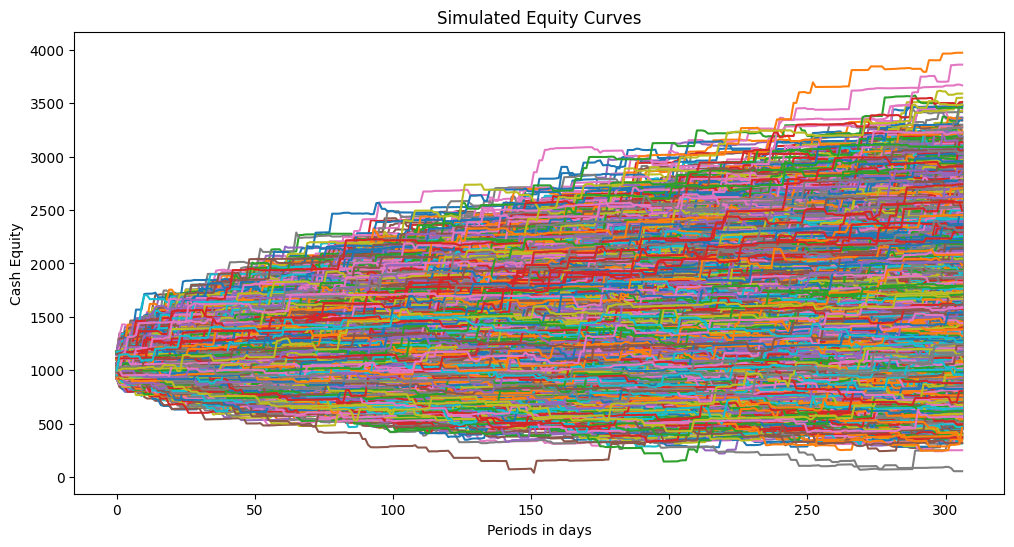

In [60]:
#Plot results
plt.figure(figsize=(12, 6))

for simulation in range(num_simulations):
    plt.plot(all_simulations[simulation])

plt.xlabel('Periods in days')
plt.ylabel('Cash Equity')
plt.title('Simulated Equity Curves')
plt.show()

In [80]:
#Calculate metrics
last_values = all_simulations[:, -1]
positive_results = len(last_values[last_values > 1000])
negative_results = len(last_values[last_values <= 1000])
zero_results = len(last_values[last_values <= 0])
risk_of_loss = negative_results / len(last_values)
risk_of_ruin = zero_results / len(last_values)

print(f"Number of POSITIVE results: {positive_results}")
print(f"Number of NEGATIVE results: {negative_results}")
print(f"Total Loss: {zero_results}")
print(f"Probability of losing: {risk_of_loss*100}%")
print(f"Probability of ruin: {risk_of_ruin*100}%")

Number of POSITIVE results: 95345
Number of NEGATIVE results: 4655
Total Loss: 0
Probability of losing: 4.655%
Probability of ruin: 0.0%
